In [1]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform

np.set_printoptions(suppress = True)                    # уберем scientific notation



In [2]:
# --------
# Часть №1. Выборочная функция распределения
# --------

# Сформируем выборку из Хи-квадрат
# распределения с df степенями свободы
np.random.seed(123)                                     # для воспроизводимости результатов, полученных с использованием
                                                        # выборок, необходима установка случайного зерна
n = 100                                                 # переменная, хранящая объем выборки
df = 5                                                  # переменная, хранящая число степеней свободы
x = chi2.rvs(size = n,                                  # объем выборки
             df = df)                                   # число степеней свободы

# Напишем эмпирическую функцию распределения
t = 5
np.mean(x <= t)                                         # эмпирическая функция распределения
                                                        # в точке t
def ecdf(t, x):                                         # функция, считающая эмпирическую функцию
    return np.mean(x <= t)                              # распределения в произвольной точке
ecdf(t, x)                                              # эмпирическая функция распределения в точке t
chi2.cdf(t, df = df)                                    # теоретическая (настоящая) функция распределения в точке t



0.584119813004492

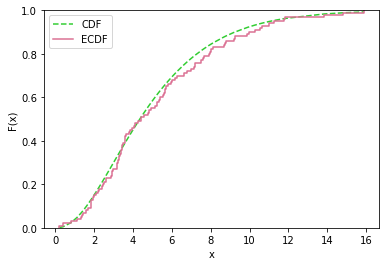

In [3]:
# Отобразим на одном графике эмпирическую и
# теоретическую (настоящую) функции распределения
# того распределения, из которого была
# получена выборка
x = np.sort(x)                                          # для удобства отсортируем
                                                        # реализации выборки
F_x = chi2.cdf(x, df = df)                              # значение функции распределения в соответствующих точках
plt.xlabel('x')                                         # название нижней оси графика
plt.ylabel('F(x)')                                      # название верхней оси графика
plt.plot(x, F_x, '--', markersize = 1,                  # график теоретической функции распределения
  label = "CDF", color = "limegreen")
seaborn.ecdfplot(x,                                     # график эмпирической функции распределения
                 label = "ECDF",
                 color = "palevioletred")
plt.legend()
# Цвета для графиков:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html



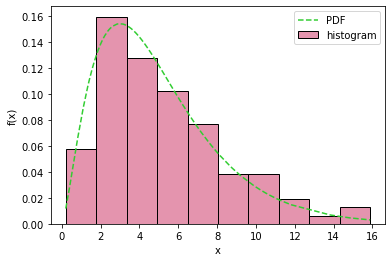

In [4]:
# --------
# Часть №2. Гистограмма (выборочная функция плотности)
# --------
f_x = chi2.pdf(x, df = df)                              # значение функции плотности в соответствующих точках
plt.xlabel('x')                                         # название нижней оси графика
plt.ylabel('f(x)')                                      # название верхней оси графика
plt.plot(x, f_x, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10)                             # число столбиков в Гистограмме
plt.legend()

In [5]:
# Рассчитаем значение Гистограммы
# в точке t вручную
t = 5                                                   # точка, в которой осуществляется расчет
t_adj = t - min(x)                                      # точка, скорректированная на минимальное значение в выборке
x_adj = x - min(x)                                      # выборка, скорректированная на минимальное значение
bin_n = 10                                              # число столбиков в Гистограмме
bin_w = (max(x) - min(x)) / bin_n                       # ширина столбика
t_w_ratio = (t_adj) / bin_w                             # отношение скорректированной точки к ширине столбика
bin_t = math.floor(t_w_ratio) + 1                       # номер столбика, в котором расположена точка
len(x[(x_adj >= ((bin_t - 1) * bin_w)) &
      (x_adj < (bin_t * bin_w))]) / (n * bin_w)         # значение Гистограммы в точке

0.10211866441041083

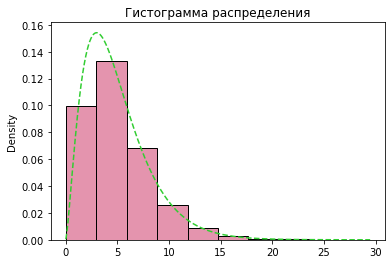

In [163]:
# Задания
# 1. Постройте графики гистограммы и выборочной
#    функции распредленеия для распределений:
#    1)     Хи-Квадрат с 5-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25
# 1
x1 = chi2.rvs(size = 100000,                                  
             df = 5) 
x1 = np.sort(x1)
f_x1 = chi2.pdf(x1, df = 5)
plt.plot(x1, f_x1, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x1, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10);
plt.title("Гистограмма распределения");

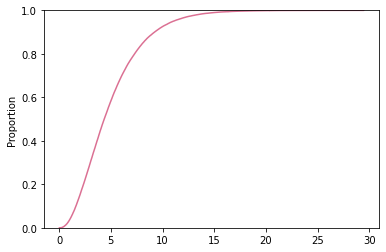

In [176]:
seaborn.ecdfplot(x1,                                     # график эмпирической функции распределения
                 label = "ECDF",
                 color = "palevioletred");

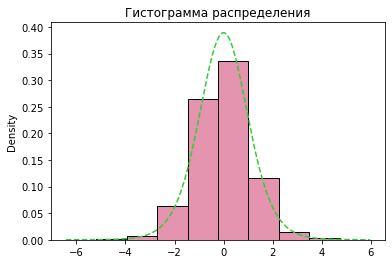

In [179]:
# 2
x2 = scipy.stats.t.rvs(size = 10000,                         # объем выборки
      df = 10)    
x2 = np.sort(x2)
f_x2 = scipy.stats.t.pdf(x2, df = 10)
plt.plot(x2, f_x2, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x2, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10) ;
plt.title("Гистограмма распределения");

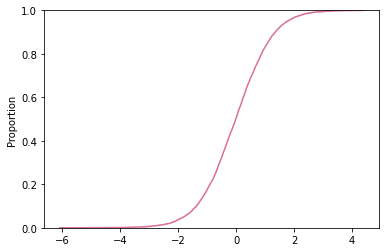

In [173]:
seaborn.ecdfplot(x2,                                     # график эмпирической функции распределения
                 label = "ECDF",
                 color = "palevioletred");

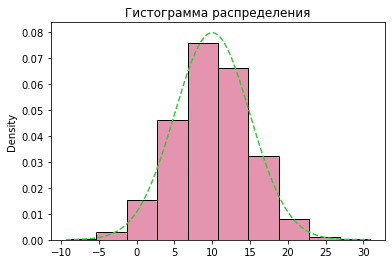

In [180]:
# 3
x3 = norm.rvs(size = 10000,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 5)
x3 = np.sort(x3)
f_x3 = norm.pdf(x3, loc = 10,                          # первое число степеней свободы
         scale = 5)
plt.plot(x3, f_x3, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x3, stat = 'density',  # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10, );
plt.title("Гистограмма распределения");

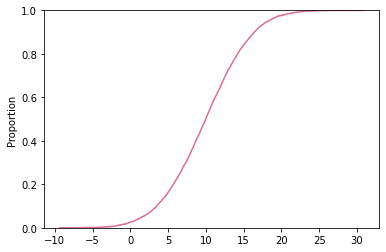

In [181]:
seaborn.ecdfplot(x3,                                     # график эмпирической функции распределения
                 label = "ECDF",
                 color = "palevioletred");

In [80]:
# 2. В каждом пункте предыдущего задания проверьте,
#    как объем выборки влияет на то, насколько близки
#    окажутся выборочные и истинные характеристики
#    распределения. Сравните выборки объемом
#    в 10, 100, 1000 и 10000 наблюдений. При увеличении
#    объема выборки увеличивайте число столбиков
#    в гистограмме.

# Рассмотрим лишь нормальное распределение (остальное по аналогии)

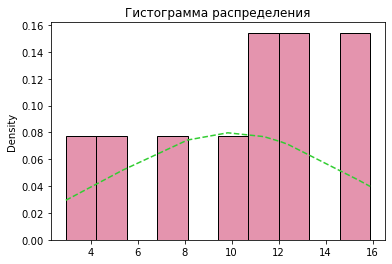

In [192]:
# size=10
x3 = norm.rvs(size = 10,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 5)
x3 = np.sort(x3)
f_x3 = norm.pdf(x3, loc = 10,                          # первое число степеней свободы
         scale = 5)
plt.plot(x3, f_x3, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x3, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10);
plt.title("Гистограмма распределения");

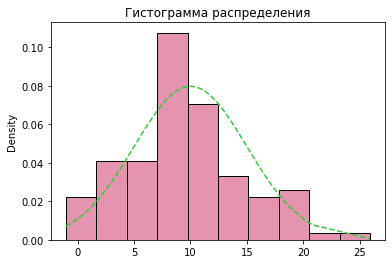

In [193]:
# 100
x3 = norm.rvs(size = 100,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 5)
x3 = np.sort(x3)
f_x3 = norm.pdf(x3, loc = 10,                          # первое число степеней свободы
         scale = 5)
plt.plot(x3, f_x3, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x3, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10);
plt.title("Гистограмма распределения");

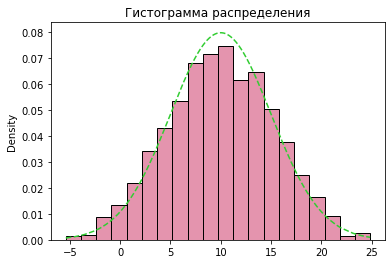

In [194]:
# 1000
x3 = norm.rvs(size = 1000,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 5)
x3 = np.sort(x3)
f_x3 = norm.pdf(x3, loc = 10,                          # первое число степеней свободы
         scale = 5)
plt.plot(x3, f_x3, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x3, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20);
plt.title("Гистограмма распределения");

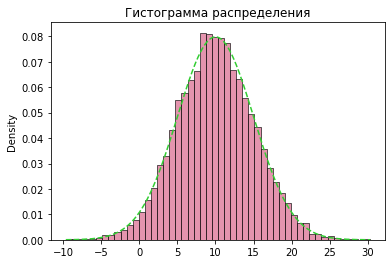

In [195]:
# 10000
x3 = norm.rvs(size = 10000,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 5)
x3 = np.sort(x3)
f_x3 = norm.pdf(x3, loc = 10,                          # первое число степеней свободы
         scale = 5)
plt.plot(x3, f_x3, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x3, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 50);
plt.title("Гистограмма распределения");

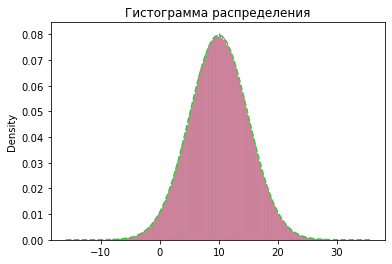

In [196]:
# 10000000
x3 = norm.rvs(size = 10000000,                      # объем выборки
         loc = 10,                          # первое число степеней свободы
         scale = 5)
x3 = np.sort(x3)
f_x3 = norm.pdf(x3, loc = 10,                          # первое число степеней свободы
         scale = 5)
plt.plot(x3, f_x3, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x3, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 1000);
plt.title("Гистограмма распределения");

In [86]:
# 3. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение выборочной
#    функции распределения для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе

In [198]:
def raspr(vyborka, nabludenye):
    return np.mean(vyborka <= nabludenye)
raspr(x3, 10)
# не оч понятно чем 2 отличается от 1 (можно сказать, что выборка -- вектор, а наблюдение -- значение в векторе)

0.5002733

In [90]:
# 4. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение гистограммы
#    для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе

In [266]:
def plotn(y, t1, bin_n1):
    # Рассчитаем значение Гистограммы
    # в точке t1 вручную                                                   # точка, в которой осуществляется расчет
    t_adj = t1 - min(y)                                      # точка, скорректированная на минимальное значение в выборке
    y_adj = y - min(y)                                      # выборка, скорректированная на минимальное значение                                              # число столбиков в Гистограмме
    bin_w = (max(y) - min(y)) / bin_n1                       # ширина столбика
    t_w_ratio = (t_adj) / bin_w                             # отношение скорректированной точки к ширине столбика
    bin_t = math.floor(t_w_ratio) + 1                       # номер столбика, в котором расположена точка
    return len(y[(y_adj >= ((bin_t - 1) * bin_w)) & (y_adj < (bin_t * bin_w))]) / (len(y) * bin_w)         # значение Гистограммы в точке

In [267]:
plotn(x3, 10, 100)
# выборка и есть вектор, непонятно, чем 1 отличается от 2

0.07975525878440594

In [ ]:
# 5. Самостоятельно запрограммируйте функции,
#    позволяющие по выборке строить график:
#    1)    Выборочной функции распределения
#    2*)   Гистограммы с произвольным
#          числом столбиков

In [208]:
# 1
def gr(v): # v -- выборка
    xv = sorted(list(set(v)))
    yv= []
    for i in xv:
        yv.append(raspr(v, i))
    plt.plot(xv, yv)

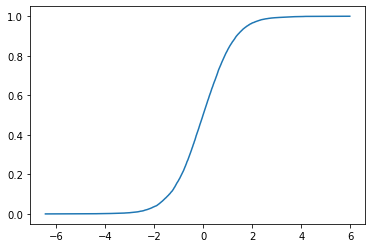

In [209]:
gr(x2) 

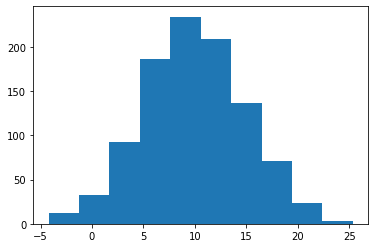

In [238]:
# 2 
x4 = norm.rvs(size = 1000,   #для примера  возьмем нормальное распределение
         loc = 10,                          # первое число степеней свободы
         scale = 5)
def gist(v, n_bins): # выборка и число столбцов
    v = np.sort(v)
    return plt.hist(v, bins = n_bins)
gist(x4, 10);

In [ ]:
# 6. Используя ЗБЧ и несколько выборок из Хи-Квадрат
#    распределения приблизительно рассчитайте:
#    1**)  Математическое ожидание выборочной функции
#          распределения в точке 5
#    2**)  Дисперсию выборочной функции распределения
#          в точке 5

In [265]:
# 1, 2

z1 = chi2.rvs(size = 1000,                                  
             df = 5) 
z2 = chi2.rvs(size = 1000,                                  
             df = 5) 
z3 = chi2.rvs(size = 1000,                                  
             df = 5) 
z4 = chi2.rvs(size = 1000,                                  
             df = 5) 
print('E(Z) =', np.mean([raspr(z1, 5), raspr(z2, 5),
                        raspr(z3, 5), raspr(z4, 5)]))
print('VAR(Z) =', np.var([raspr(z1, 5) , raspr(z2, 5) ,
                        raspr(z3, 5) , raspr(z4, 5)]))

E(Z) = 0.5854999999999999
VAR(Z) = 7.325000000000014e-05
